# 4장 첫 번째 사례 탐구의 솔루션

목표
딜러에게 멈추라고 말할 때까지 카드를 반복적으로 뒤집는 카드 게임 진행.
그 후 카드를 한 장 추가로 뒤집기.
뒤집은 카드가 빨간색이면 1달러를 벌고, 그렇지 않으면 1달러를 잃음음

1. 임의로 섞인 카드 덱에서 빨간색 카드를 예측하는 여러 전략을 개발
2. 각 전략에 여러 시뮬레이션을 적용하여 높은 신뢰 구간의 성공 확률을 계산.
3. 성공 확률이 가장 높은 가장 간단한 전략을 반환

## 카드 덱 52장에 대해 전략 결과를 그림으로 표현하기

In [8]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

total_cards = 52
total_red_cards = 26
red_cards = 26 * [1]
black_cards = 26 * [0]
unshuffled_deck = red_cards + black_cards

def execute_strategy(min_red_fraction = 0.5, shuffled_deck=None, return_index = False):
    if shuffled_deck is None:
        shuffled_deck = np.random.permutation(unshuffled_deck)
    
    remaining_red_cards = total_red_cards
    
    for i, card in enumerate(shuffled_deck[:-1]):
        remaining_red_cards -= card
        fraction_red_cards = remaining_red_cards / (total_cards-i-1)
        if fraction_red_cards > min_red_fraction:
            break
        
    return (i+1, shuffled_deck[i+1]) if return_index else shuffled_deck[i+1]

In [11]:
def repeat_game_detailed(number_repeats, min_red_fraction):
    observations = [execute_strategy(min_red_fraction, return_index=True)
                    for _ in range(number_repeats)]
    successes = [index for index, card, in observations if card == 1]
    halt_success = len([index for index in successes if index != 51])
    no_halt_success = len(successes) - halt_success
    
    failures = [index for index, card, in observations if card == 0]
    halt_failure = len([index for index in failures if index != 51])
    no_halt_failure = len(failures) - halt_failure
    result = [halt_success, halt_failure, no_halt_success, no_halt_failure]
    return [r/number_repeats for r in result]

fractions = [value / 100 for value in range(50, 100)]
num_repeats = 50000
result_types = ([], [], [], [])

for fraction in fractions:
    result = repeat_game_detailed(num_repeats, fraction)
    for i in range(4):
        result_types[i].append(result[i])

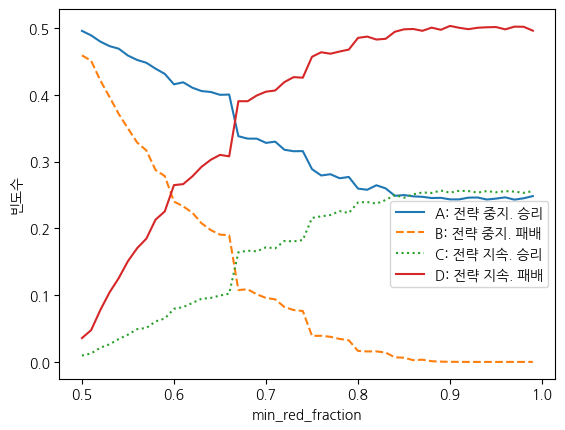

In [12]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# 나눔고딕 폰트 경로 지정
font_path = os.path.join('nanum-gothic', 'NanumGothic.ttf')
fontprop = fm.FontProperties(fname=font_path)
plt.rc('font', family=fontprop.get_name())
plt.rcParams['axes.unicode_minus'] = False

# 예시 그래프 (여기에 기존 plot 코드 삽입)
plt.plot(fractions, result_types[0], label='A: 전략 중지. 승리')
plt.plot(fractions, result_types[1], linestyle='--', label='B: 전략 중지. 패배')
plt.plot(fractions, result_types[2], linestyle=':', label='C: 전략 지속. 승리')
plt.plot(fractions, result_types[3], linestyle='-', label='D: 전략 지속. 패배')
plt.xlabel('min_red_fraction')
plt.ylabel('빈도수')
plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.show()

In [13]:
# 최적의 승리 전략: 첫번째 카드를 선택하는 것
def optimal_strategy(shuffled_deck):
    return shuffled_deck[0]

## 요약
- 확률은 직관적이지 X. 무작위 과정을 다룰 때에는 미래의 결과에 베팅하기 전에 모든 직관적인 가정을 엄격하게 테스트하는 것이 좋음
- 직관적으로 세운 솔루션이 간단한 버전 문제에서 실패한다면 실제 버전 문제에서도 실패할 가능성 높음.